In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


#zz-gate
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rz(pi/2, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
#zz-gate
circuit.cx(qreg_q[0], qreg_q[2])
circuit.rz(pi/2, qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
#zz-gate
circuit.cx(qreg_q[0], qreg_q[3])
circuit.rz(pi/2, qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[3])
#zz-gate
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rz(pi/2, qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])

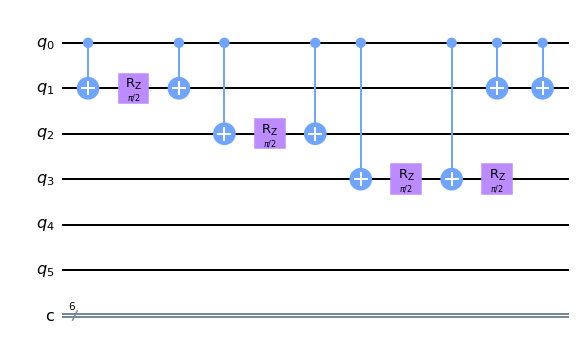

In [3]:
circuit.draw(output = 'mpl')

In [4]:
provider2 = IBMQ.get_provider(hub='ibm-q-pnnl', group='internal', project='default')
print(provider2.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>, <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-pnnl', group='internal', project='default')>]


In [5]:
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [6]:
mybackend = provider2.get_backend('ibmq_casablanca')

In [7]:
config = mybackend.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_casablanca, and is on version 1.2.47. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


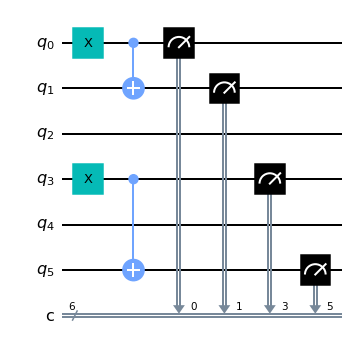

In [8]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(6, 'c')
circuit2 = QuantumCircuit(q, c)
circuit2.x(q[0])
circuit2.x(q[3])
circuit2.cx(q[0], q[1])
# circuit2.barrier(q[0])
# circuit2.barrier(q[1])
# circuit2.barrier(q[2])
# circuit2.barrier(q[3])
# circuit2.barrier(q[5])
circuit2.cx(q[3], q[5])
circuit2.measure(q[0],c[0])
circuit2.measure(q[1],c[1])
circuit2.measure(q[3],c[3])
circuit2.measure(q[5],c[5])
circuit2.draw(output= 'mpl')


In [9]:
#building transpile and initial mapping
trans = transpile(circuit, mybackend, initial_layout=[0, 1, 2,3,4,5])
plot_circuit_layout(trans, mybackend)
from qiskit.tools.monitor import job_monitor
from qiskit import execute
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192


job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
job_monitor(job_exp)


Job Status: job has successfully run


In [10]:
result = job_exp.result()
counts = result.get_counts()
print(counts)


{'000001': 3, '000010': 2, '100001': 2, '100010': 5, '100011': 116, '101000': 85, '101001': 237, '101010': 444, '101011': 6962, '000011': 75, '001000': 2, '001001': 6, '001010': 14, '001011': 239}


In [11]:
error_rate = 1-counts['101011'] / shots
print(error_rate)

0.150146484375


In [12]:
simback = provider2.get_backend('ibmq_qasm_simulator')

In [13]:
config2 = simback.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config2.backend_name,
                config2.backend_version,
                config2.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config2.basis_gates))

This backend is called ibmq_qasm_simulator, and is on version 0.1.547. It has 32 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['u1', 'u2', 'u3', 'u', 'p', 'r', 'rx', 'ry', 'rz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 'sx', 't', 'tdg', 'swap', 'cx', 'cy', 'cz', 'csx', 'cp', 'cu1', 'cu2', 'cu3', 'rxx', 'ryy', 'rzz', 'rzx', 'ccx', 'cswap', 'mcx', 'mcy', 'mcz', 'mcsx', 'mcp', 'mcu1', 'mcu2', 'mcu3', 'mcrx', 'mcry', 'mcrz', 'mcr', 'mcswap', 'unitary', 'diagonal', 'multiplexer', 'initialize', 'kraus', 'roerror', 'delay'].


In [14]:
job = execute(circuit2, simback, initial_layout=[0, 1, 2,3,4,5])
result2 = job.result()
counts2 = result2.get_counts()
print(counts2)

{'101011': 1024}


In [15]:
print(result2)

Result(backend_name='ibmq_qasm_simulator', backend_version='0.9.1', qobj_id='dc761c5f-2b8d-4eba-88e2-620bcbc5d605', job_id='61a0013ddf2795e87c689bf8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2b': 1024}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3], ['c', 4], ['c', 5]], creg_sizes=[['c', 6]], global_phase=0.0, memory_slots=6, metadata={}, n_qubits=6, name='circuit-3', qreg_sizes=[['q', 6]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5]]), status=DONE, metadata={'active_input_qubits': [0, 1, 3, 5], 'device': 'CPU', 'fusion': {'enabled': False}, 'input_qubit_map': [[5, 3], [3, 2], [1, 1], [0, 0]], 'measure_sampling': True, 'method': 'stabilizer', 'noise': 'ideal', 'num_clbits': 6, 'num_qubits': 4, 'parallel_shots': 1, 'parallel_state_update': 16, 'remapped_qubits': True}, seed_simulator=1025714318, time_taken=0.0031616590000000003)], date=2021-11-25 

In [16]:
def singletestcrosstalk( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[0])
    circuit2.x(q[3])
    circuit2.cx(q[0], q[1])
    # circuit2.barrier(q[0])
    # circuit2.barrier(q[1])
    # circuit2.barrier(q[2])
    # circuit2.barrier(q[3])
    # circuit2.barrier(q[5])
    circuit2.cx(q[3], q[5])
    circuit2.measure(q[0],c[0])
    circuit2.measure(q[1],c[1])
    circuit2.measure(q[3],c[3])
    circuit2.measure(q[5],c[5])
    shots = 8192


    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts['101011'] / shots
    return error_rate

In [17]:
list = [1,3]
ans = singletestcrosstalk(list)
print(ans)

Job Status: job has successfully run
0.1455078125


In [18]:
myans = []
for x in range(10):
    cur = singletestcrosstalk(list)
    myans.append(cur)
    print(cur)
print(myans)

Job Status: job has successfully run
0.162109375
Job Status: job has successfully run
0.1455078125
Job Status: job has successfully run
0.1629638671875
Job Status: job has successfully run
0.1566162109375
Job Status: job has successfully run
0.1419677734375
Job Status: job has successfully run
0.15185546875
Job Status: job has successfully run
0.1513671875
Job Status: job has successfully run
0.177734375
Job Status: job has successfully run
0.1512451171875
Job Status: job has successfully run
0.155029296875
[0.162109375, 0.1455078125, 0.1629638671875, 0.1566162109375, 0.1419677734375, 0.15185546875, 0.1513671875, 0.177734375, 0.1512451171875, 0.155029296875]


In [20]:
  print(myans)
import numpy as np
from numpy import mean
print(mean(myans))

[0.162109375, 0.1455078125, 0.1629638671875, 0.1566162109375, 0.1419677734375, 0.15185546875, 0.1513671875, 0.177734375, 0.1512451171875, 0.155029296875]
0.1556396484375


In [23]:
def singletestnormal( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[0])
    circuit2.x(q[3])
    circuit2.cx(q[0], q[1])
    circuit2.barrier(q[0])
    circuit2.barrier(q[1])
    circuit2.barrier(q[3])
    circuit2.barrier(q[5])
    circuit2.cx(q[3], q[5])
    circuit2.measure(q[0],c[0])
    circuit2.measure(q[1],c[1])
    circuit2.measure(q[3],c[3])
    circuit2.measure(q[5],c[5])
    #circuit2.draw(output = 'mpl')
    shots = 8192


    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts['101011'] / shots
    return error_rate

In [24]:
nocross = []
for x in range(10):
    cur = singletestnormal(list)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

Job Status: job has successfully run
0.156494140625
Job Status: job has successfully run
0.1512451171875
Job Status: job has successfully run
0.1634521484375
Job Status: job has successfully run
0.15625
Job Status: job has successfully run
0.2110595703125
Job Status: job has successfully run
0.1534423828125
Job Status: job has successfully run
0.15087890625
Job Status: job has successfully run
0.1478271484375
Job Status: job has successfully run
0.137451171875
Job Status: job has successfully run
0.168701171875
[0.156494140625, 0.1512451171875, 0.1634521484375, 0.15625, 0.2110595703125, 0.1534423828125, 0.15087890625, 0.1478271484375, 0.137451171875, 0.168701171875]
0.15968017578125


In [70]:
def stest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.barrier()
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    shots = 20000
    string = "000000"

    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate


In [ ]:
testlist = [1,2,3,5]
nocross = []
for x in range(50):
    cur = stest(testlist)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

101110
Job Status: job has successfully run
0.14290000000000003
101110
Job Status: job has successfully run
0.14365000000000006
101110
Job Status: job has successfully run
0.14005
101110
Job Status: job has successfully run
0.12104999999999999
101110
Job Status: job has successfully run
0.1351
101110
Job Status: job has successfully run
0.15364999999999995
101110
Job Status: job has successfully run
0.12990000000000002
101110
Job Status: job has successfully run
0.14385000000000003
101110
Job Status: job has successfully run
0.13605
101110
Job Status: job has successfully run
0.137
101110
Job Status: job has successfully run
0.13970000000000005
101110
Job Status: job has successfully run
0.13395
101110
Job Status: job has successfully run
0.1351
101110
Job Status: job is queued (1)     

In [48]:
nocross = []
for x in range(20):
    cur = stest(testlist)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

111010
Job Status: job has successfully run
0.1162109375
111010
Job Status: job has successfully run
0.1170654296875
111010
Job Status: job has successfully run
0.11767578125
111010
Job Status: job has successfully run
0.1573486328125
111010
Job Status: job has successfully run
0.158203125
111010
Job Status: job has successfully run
0.1114501953125
111010
Job Status: job has successfully run
0.1241455078125
111010
Job Status: job has successfully run
0.1220703125
111010
Job Status: job has successfully run
0.1236572265625
111010
Job Status: job has successfully run
0.1256103515625
111010
Job Status: job has successfully run
0.1114501953125
111010
Job Status: job has successfully run
0.119384765625
111010
Job Status: job has successfully run
0.1246337890625
111010
Job Status: job has successfully run
0.1319580078125
111010
Job Status: job has successfully run
0.1165771484375
111010
Job Status: job has successfully run
0.1553955078125
111010
Job Status: job has successfully run
0.1243896

In [10]:
def ctest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5])
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate


In [52]:
nocross = []
for x in range(10):
    cur = stest(testlist)
    nocross.append(cur)
    print(cur)
print(nocross)
print(mean(nocross))

111010
Job Status: job has successfully run
0.1263427734375
111010
Job Status: job has successfully run
0.1368408203125
111010
Job Status: job has successfully run
0.1373291015625
111010
Job Status: job has successfully run
0.1483154296875
111010
Job Status: job has successfully run
0.1285400390625
111010
Job Status: job has successfully run
0.112060546875
111010
Job Status: job has successfully run
0.15478515625
111010
Job Status: job has successfully run
0.1082763671875
111010
Job Status: job has successfully run
0.1162109375
111010
Job Status: job has successfully run
0.1116943359375
111010
Job Status: job has successfully run
0.112548828125
111010
Job Status: job has successfully run
0.1116943359375
111010
Job Status: job has successfully run
0.1124267578125
111010
Job Status: job has successfully run
0.1357421875
111010
Job Status: job has successfully run
0.1044921875
111010
Job Status: job has successfully run
0.111083984375
111010
Job Status: job has successfully run
0.16638183

In [15]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(20):
    cur = stest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("without crosstalk")
print(mean(nocross))


101110
Job Status: job is queued (1)     

KeyboardInterrupt: 

In [12]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(20):
    cur = ctest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
0.12980000000000003
101110
Job Status: job has successfully run
0.10340000000000005
101110
Job Status: job has successfully run
0.12360000000000004
101110
Job Status: job has successfully run
0.13315
101110
Job Status: job has successfully run
0.11750000000000005
101110
Job Status: job has successfully run
0.1008
101110
Job Status: job has successfully run
0.10585
101110
Job Status: job has successfully run
0.12429999999999997
101110
Job Status: job has successfully run
0.16595000000000004
101110
Job Status: job has successfully run
0.11695
101110
Job Status: job has successfully run
0.11260000000000003
101110
Job Status: job has successfully run
0.10880000000000001
101110
Job Status: job has successfully run
0.11395
101110
Job Status: job has successfully run
0.11595
101110
Job Status: job has successfully run
0.12070000000000003
101110
Job Status: job has successfully run
0.11755000000000004
101110
Job Status: job has successfully run
0.118

In [88]:
def circuit( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    circuit2.x(q[list[0]])
    circuit2.x(q[list[2]])
    circuit2.barrier()
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier()
    
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    return circuit2

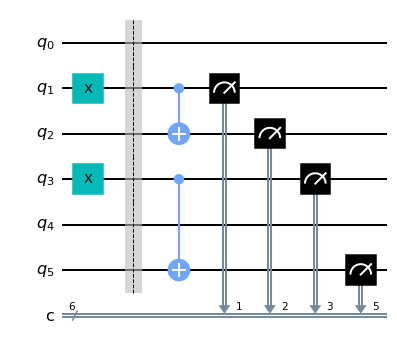

In [89]:
circuit3 = circuit([1,2,3,5])
circuit3.draw()

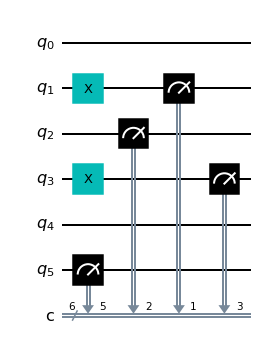

In [84]:
circuit3 = transpile(circuit3)
circuit3.draw()

In [85]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
# circuit3 = circuit3.decompose()
circuit3.draw()
print(circuit3.depth())

2


In [51]:
import pdb
def eztest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    # circuit2.barrier(q[list[0]])
    # circuit2.barrier(q[list[1]])
    # circuit2.barrier(q[list[2]])
    # circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5],optimization_level=None)
    job_monitor(job_exp)
    result = job_exp.result()
    pdb.set_trace()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate

In [45]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(1):
    cur = stest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
Traceback (most recent call last):
  File "/tmp/ipykernel_132/3678075466.py", line 8, in <module>
    cur = eztest(test3)
  File "/tmp/ipykernel_132/195097898.py", line 30, in eztest
    error_rate = 1-counts[string] / shots
KeyError: '101110'

Use %tb to get the full traceback.


In [40]:
def ectest( list ):
    q = QuantumRegister(6, 'q')
    c = ClassicalRegister(6, 'c')
    circuit2 = QuantumCircuit(q, c)
    # circuit2.x(q[list[0]])
    # circuit2.x(q[list[2]])
    circuit2.cx(q[list[0]], q[list[1]])
    circuit2.barrier(q[list[0]])
    circuit2.barrier(q[list[1]])
    circuit2.barrier(q[list[2]])
    circuit2.barrier(q[list[3]])
    circuit2.cx(q[list[2]], [list[3]])
    circuit2.measure(q[list[0]],c[list[0]])
    circuit2.measure(q[list[1]],c[list[1]])
    circuit2.measure(q[list[2]],c[list[2]])
    circuit2.measure(q[list[3]],c[list[3]])
    #circuit2.draw(output = 'mpl')
    string = "000000"
    shots = 20000
    for i in list:
        string = string[:i] + '1' + string[i + 1:]

    string = string[::-1]
    print(string)
    
    job_exp = execute(circuit2, mybackend, shots=shots, initial_layout=[0, 1, 2,3,4,5],optimization_level=None)
    job_monitor(job_exp)
    result = job_exp.result()
    counts = result.get_counts()
    error_rate = 1-counts[string] / shots
    return error_rate

In [41]:
test3 = [1,2,3,5]
import numpy as np
from numpy import mean
from qiskit.tools.monitor import job_monitor
from qiskit import execute
nocross = []
for x in range(1):
    cur = ectest(test3)
    nocross.append(cur)
    print(cur)
print(nocross)
print("with crosstalk")
print(mean(nocross))

101110
Job Status: job has successfully run
0.99995
[0.99995]
with crosstalk
0.99995
